In [270]:
import pandas as pd
import numpy as np
from astropy.io import fits
import seaborn as sns
import matplotlib.pyplot as plt
path ='/Users/patito/Documents/topicos/topicos/ModuloII/dolphot2.0/fits'

In [241]:
columns = pd.read_table(path+'/f814/j9ec41aiq_flc_dolphot.columns', header=0)
#if is necessary read, just print columns
lista=[]
for i in columns['#']:
    lista.append(i)


### f814

In [242]:
df_aiq_flc = pd.read_fwf(path+'/f814/j9ec41aiq_flc_dolphot', names=lista)
filters_814 = df_aiq_flc[(df_aiq_flc['28. Photometry quality flag, j9ec41aiq_flc (355.0 sec)'] <= 2) & (df_aiq_flc['11. Object type (1=bright star, 2=faint, 3=elongated, 4=hot pixel, 5=extended)']==1)]

In [243]:
sharpness_814 = filters_814['20. Sharpness, j9ec41aiq_flc (355.0 sec)'].reset_index(drop=True)
crowding_814 = filters_814['22. Crowding, j9ec41aiq_flc (355.0 sec)'].reset_index(drop=True)
signal_814 = filters_814['19. Signal-to-noise, j9ec41aiq_flc (355.0 sec)'].reset_index(drop=True)
mags_814 = filters_814['16. Instrumental magnitude, j9ec41aiq_flc (355.0 sec)'].reset_index(drop=True)
pos_x_814 = filters_814['3. Object X position on reference image (or first image, if no reference)'].reset_index(drop=True)
pos_y_814 = filters_814['4. Object Y position on reference image (or first image, if no reference)'].reset_index(drop=True)

In [244]:
#ahora toca ver que es cull3 sparse field: hay que tener los datos para las dos para poder ahcerlo

### f606


In [245]:
df_agq_flc = pd.read_fwf(path+'/f606/j9ec41agq_flc_dolphot', names=lista)

In [246]:
filters_606 = df_agq_flc[(df_agq_flc['28. Photometry quality flag, j9ec41aiq_flc (355.0 sec)'] <= 2) & (df_agq_flc['11. Object type (1=bright star, 2=faint, 3=elongated, 4=hot pixel, 5=extended)'] == 1)]

In [247]:
sharpness_606 = filters_606['7. Object sharpness'].reset_index(drop=True)
crowding_606 = filters_606['10. Crowding'].reset_index(drop=True)
signal_606 = filters_606['6. Signal-to-noise'].reset_index(drop=True)
mags_606 = filters_606['16. Instrumental magnitude, j9ec41aiq_flc (355.0 sec)'].reset_index(drop=True)
pos_x_606 = filters_606['3. Object X position on reference image (or first image, if no reference)'].reset_index(drop=True)
pos_y_606 = filters_606['4. Object Y position on reference image (or first image, if no reference)'].reset_index(drop=True)


### Culls

In [248]:
data_dict= {
    'sharpness_606' : sharpness_606,
    'crowding_606' : crowding_606,
    'signal_606' : signal_606,
    'mags_606' : mags_606,
    'pos_x_606': pos_x_606,
    'pos_y_606' : pos_y_606,
    'sharpness_814': sharpness_814,
    'crowding_814': crowding_814,
    'signal_814' : signal_814,
    'mags_814': mags_814,
    'pos_x_814' : pos_x_814,
    'pos_y_814' : pos_y_814
}

In [249]:
data_culls = pd.DataFrame.from_dict(data_dict, dtype=float)

In [257]:
#position match
tresh = 80 
match = data_culls[(data_culls['pos_y_606'] > data_culls['pos_y_814']-tresh) & (data_culls['pos_y_606'] < data_culls['pos_y_814']+tresh)]
match = match[(data_culls['signal_606']>5) & (data_culls['signal_814']>5)]

/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_68023/2276610655.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  match = match[(data_culls['signal_606']>5) & (data_culls['signal_814']>5)]


In [264]:
sharp_sum = match['sharpness_606'] + match['sharpness_814']
crowd_sum = match['crowding_606'] + match['crowding_814']

match['sharp_sum'] = sharp_sum
match['crowd_sum'] = crowd_sum

In [272]:
sharp_match = match[(match['sharp_sum']>-0.06) & (match['sharp_sum']<1.30)]

final_match = sharp_match[(sharp_match['crowd_sum']<0.16)]

(26.0, 21.0)

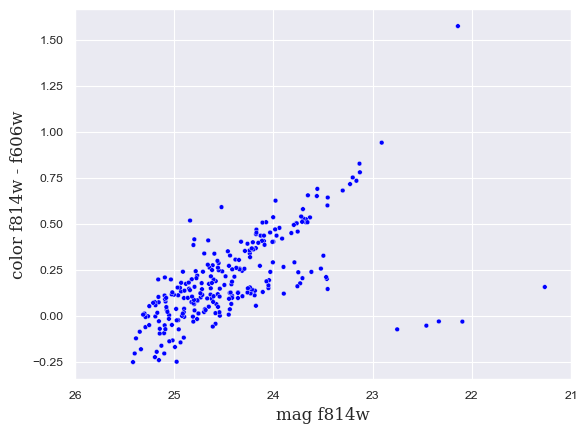

In [292]:
fig, ax = plt.subplots(1,1)
sns.set_theme('paper', style='darkgrid')

sns.scatterplot(x=final_match['mags_814'],y=final_match['mags_606']-final_match['mags_814'], size=1,
                color='blue', legend=False)
ax.set_ylabel('color f814w - f606w', fontfamily='serif', fontsize=12)
ax.set_xlabel('mag f814w', fontfamily='serif', fontsize=12)
ax.set_xlim(26,21)

Text(0.5, 1.0, 'spatial distribution of the stars')

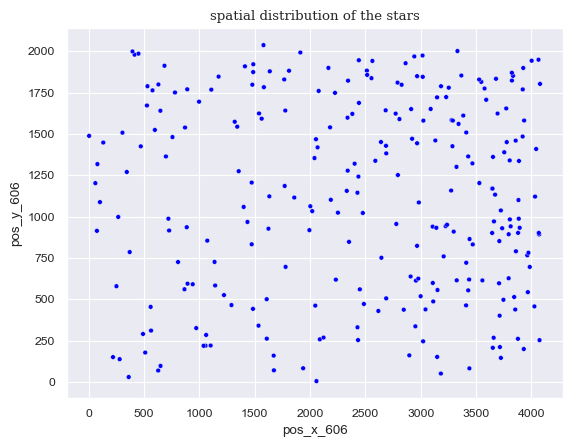

In [295]:
fig, ax = plt.subplots(1,1)
sns.set_theme('paper', style='darkgrid')

sns.scatterplot(x=final_match['pos_x_606'],y=final_match['pos_y_606'], size=1,
                color='blue', legend=False)
ax.set_title('spatial distribution of the stars', fontfamily='serif')